<a href="https://colab.research.google.com/github/yunseo4401/statistical-analysis/blob/main/%EB%B6%84%EC%82%B0%EB%B6%84%EC%84%9D(ANOVA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#분산분석 
- 두개 이상의 다수 집단 간 평균을 비교하는 통계분석 방법 
- 종속변수는 연속형, 독립변수는 범주형 변수여야 함 
- 독립변수의 개수에 따라 일원배치, 이원배치, 다원배치 분산분석 (종속변수는 모두 1개) 
- 두개 이상의 집단에서 그룹 평균 간 차이를 그룹 내 변동에 비교하여 살펴보는 통계분석 
- 집단 내에 분산보다 다른 집단과의 분산이 더 크다면 유의하다고 할 수 있음 
- 즉, 분산분석은 두 개이상의 집단들의 평균이 같은지를 통계적으로 검증하는 방법 

#일원배치 분산분석 
- 종속변수에 대한 하나의 범주형 변수의 영향을 알아보기 위해 사용 
- 모집단 수에 제한이 없고, 각 표본의 수는 같지 않아도 됨 
- f검정 통계량을 이용한다. 
- 가정 : 집단 측정치는 서로 독립적, 정규분포임. 집단 측정치의 분산은 같다. 
- 귀무가설 : k개의 집단 간 모평균에는 차이가 없다. 
- 대립가설 : k개의 집단 간 모평균이 모두 같다고 할 수 없다. 
- 사후검정 : 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명되었을경우, 어떤 집단들에 대해서 평균의 차이가 존재하는지를 알아보기위해 실시

In [1]:
import scipy.stats as stats
import pandas as pd
iris_data=pd.read_csv('iris.txt',sep=',')
iris_data.head(5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#종 별로 꽃받침의 폭의 평균이 같은지 혹은 차이가 있는지 분산분석을 수행해보자. 

In [3]:
iris_data['target'].value_counts()
#50개씩 분포 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [4]:
#target별로 변수에 할당하여 분산분석을 진행해보자. 
target_list=iris_data['target'].unique()
setosa=iris_data[iris_data['target']==target_list[0]]['sepal width']
versicolor=iris_data[iris_data['target']==target_list[1]]['sepal width']
virginica=iris_data[iris_data['target']==target_list[2]]['sepal width']
print(target_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


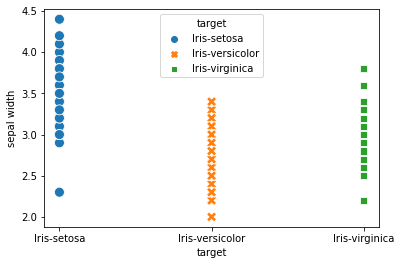

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='target',y='sepal width',hue='target',style='target',s=100,data=iris_data)
plt.show()
#시각화 결과 3종류의 평균은 차이가 있어보인다. 

In [6]:
#귀무가설 : 세가지 종에 대해 Sepal.width의 평균은 모두같다
#대립가설 : 적어도 하나의 종에 대해 sepal.width의 평균값에는 차이가 있음 
#우선 정규성먼저 확인 
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [7]:
#3개의 표본 모두 정규성을 만족하므로 등분산 검정을 시행한다. 
stats.levene(setosa,versicolor,virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [8]:
#세 집단 간의 분산이 같다고 할 수 있음 ANOVA검정 시작 
stats.f_oneway(setosa,versicolor,virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

In [10]:
#유의수준보다 작으므로 귀무가설 기각. 세가지 종의 꽃받침 폭의 평균은 차이가 있음 
#사후검정해보자 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(data=iris_data['sepal width'],groups=iris_data['target'])
tuekeyhsd=mc.tukeyhsd(alpha=0.05)


In [11]:
tuekeyhsd.summary()
#모든 집단 수준에 대하여 두 집단씩 짝을 지어 다중비교를 수행해줌 
#세개의 경우 모두 유의수준보다 작으므로 귀무가설 기각. 즉 평균값이 통계적으로 유의한 차이가 있음 
#meandiff의 양수음수를 통해 누가 더 큰지 알 수 있음 

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.001,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.001,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.0089,0.0428,0.3652,True


#이원배치분산분석
- 하나의 종속변수(연속형)에 대한 두 개의 독립변수(범주형)의 영향을 알아보기 위한 검증방법 
- 두 독립변수 A,B사이에 상관관계가 있는지를 살펴보는 교호작용에 대한 검증필수 
- F검정 통계량을 이용 
- 가정 : 집단의 측정치는 서로 독립적이며, 정규분포를 따름, 등분산성 
- 귀무가설1: a와 b변수의 교호작용이 없다. 
- 귀무가설2 :a변수에 따른 종속변수 값에는 차이가 없다. 
- 귀무가설3 : b변수에 따른 종속변수의 값에는 차이가 없다. 

In [12]:
#변속기의 종류(am)와 실린더 개수(cyl)에 따라 주행거리(mpg)평균에 유의미한 차이가 존재하는지 이원배치 분산분석 수행 
import pandas as pd
mtcars=pd.read_csv('mtcars.txt',sep=',')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
mtcars=mtcars[['mpg','am','cyl']]

In [14]:
mtcars['cyl'].value_counts() #범주형 변수임을 확인가능 

8    14
4    11
6     7
Name: cyl, dtype: int64

In [15]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula='mpg~C(cyl) + C(am) + C(cyl):C(am)'
model=ols(formula,mtcars).fit()
aov_table=anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


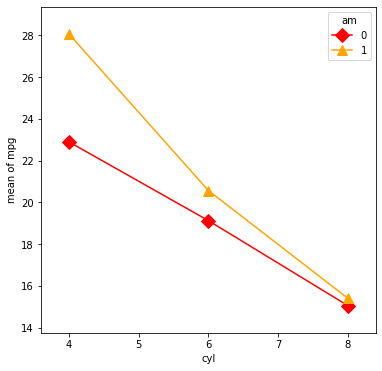

In [18]:
#교호작용은 0.2686으로 0.05보다 크므로 귀무가설을 기각하지 않음> 교호작용이 존재하지 않음 
#교호작용이 존재하지 않을때 아래같은 주효과검정이 의미를 가짐 
#cyl에 대한 p값은 유의수준보다 작으므로 귀무가설 기각 > 유의미한 차이 존재 
#am 귀무가설 기각못함 
#교호작용 효과는 그래프로 해석하는 것이 더욱 직관적임 
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
cyl=mtcars['cyl']
am=mtcars['am']
mpg=mtcars['mpg']
fig,ax= plt.subplots(figsize=(6,6))
fig=interaction_plot(cyl,am,mpg,colors=['red','orange'],markers=['D','^'],ms=10, ax=ax)
#교차점이 있는 경우 교호작용이 있다고 판단함 